In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from os import environ
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sb
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from IPython.display import Image

environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

2024-12-24 18:15:26.345989: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-24 18:15:26.354954: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735064126.363871 1667562 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735064126.366782 1667562 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-24 18:15:26.377835: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
sensor_data = pd.read_csv("sensor_data.csv")
sensor_data.head()

,Freq [GHz],S12 Mag,S13 Mag,S14 Mag,S23 Mag,S24 Mag,S34 Mag,S12 Phase,S13 Phase,S14 Phase,...,S11 Mag,S22 Mag,S33 Mag,S44 Mag,S11 Phase,S22 Phase,S33 Phase,S44 Phase,Unnamed: 21,Size
0,0.5000,-37.187724,-31.418885,-34.128856,-29.037817,-33.332027,-40.789799,164.926277,149.138013,-143.880974,...,-0.331620,-0.204848,-0.397357,-0.219184,-13.935012,-23.023129,-21.882408,-17.095157,NaN,20
1,0.5058,-36.529669,-31.647838,-32.657613,-32.239524,-34.754974,-41.211043,156.204499,146.762764,-145.747771,...,-0.263459,-0.195931,-0.454456,-0.201555,-14.192140,-23.267137,-22.690164,-17.715602,NaN,20
2,0.5116,-35.776202,-31.917526,-31.326502,-34.768130,-36.353212,-42.016227,145.866520,144.636798,-149.366067,...,-0.224686,-0.184203,-0.533002,-0.191447,-14.698938,-23.579309,-23.310765,-18.269225,NaN,20
3,0.5174,-34.788751,-31.919946,-29.916169,-36.361959,-37.893149,-43.354957,136.036378,142.489474,-154.253116,...,-0.193858,-0.179147,-0.634686,-0.190974,-15.257679,-23.900862,-23.773387,-18.986116,NaN,20
4,0.5232,-33.955711,-31.922941,-28.488877,-37.732709,-39.603751,-45.046499,125.617079,139.395481,-161.396789,...,-0.188661,-0.178598,-0.805936,-0.194009,-15.601821,-24.109574,-23.818354,-19.463586,NaN,20


In [3]:
def clean_data(sensor_data):
    sensor_data = sensor_data.drop(columns=['Unnamed: 21'])
    return sensor_data

sensor_data_clean = clean_data(sensor_data.copy())
sensor_data_clean.head()

,Freq [GHz],S12 Mag,S13 Mag,S14 Mag,S23 Mag,S24 Mag,S34 Mag,S12 Phase,S13 Phase,S14 Phase,...,S34 Phase,S11 Mag,S22 Mag,S33 Mag,S44 Mag,S11 Phase,S22 Phase,S33 Phase,S44 Phase,Size
0,0.5000,-37.187724,-31.418885,-34.128856,-29.037817,-33.332027,-40.789799,164.926277,149.138013,-143.880974,...,-61.553371,-0.331620,-0.204848,-0.397357,-0.219184,-13.935012,-23.023129,-21.882408,-17.095157,20
1,0.5058,-36.529669,-31.647838,-32.657613,-32.239524,-34.754974,-41.211043,156.204499,146.762764,-145.747771,...,-62.741733,-0.263459,-0.195931,-0.454456,-0.201555,-14.192140,-23.267137,-22.690164,-17.715602,20
2,0.5116,-35.776202,-31.917526,-31.326502,-34.768130,-36.353212,-42.016227,145.866520,144.636798,-149.366067,...,-70.396311,-0.224686,-0.184203,-0.533002,-0.191447,-14.698938,-23.579309,-23.310765,-18.269225,20
3,0.5174,-34.788751,-31.919946,-29.916169,-36.361959,-37.893149,-43.354957,136.036378,142.489474,-154.253116,...,-72.342614,-0.193858,-0.179147,-0.634686,-0.190974,-15.257679,-23.900862,-23.773387,-18.986116,20
4,0.5232,-33.955711,-31.922941,-28.488877,-37.732709,-39.603751,-45.046499,125.617079,139.395481,-161.396789,...,-71.797398,-0.188661,-0.178598,-0.805936,-0.194009,-15.601821,-24.109574,-23.818354,-19.463586,20


In [4]:
X, y = sensor_data_clean.drop(columns=['Size']), sensor_data_clean['Size']
y = y / 20

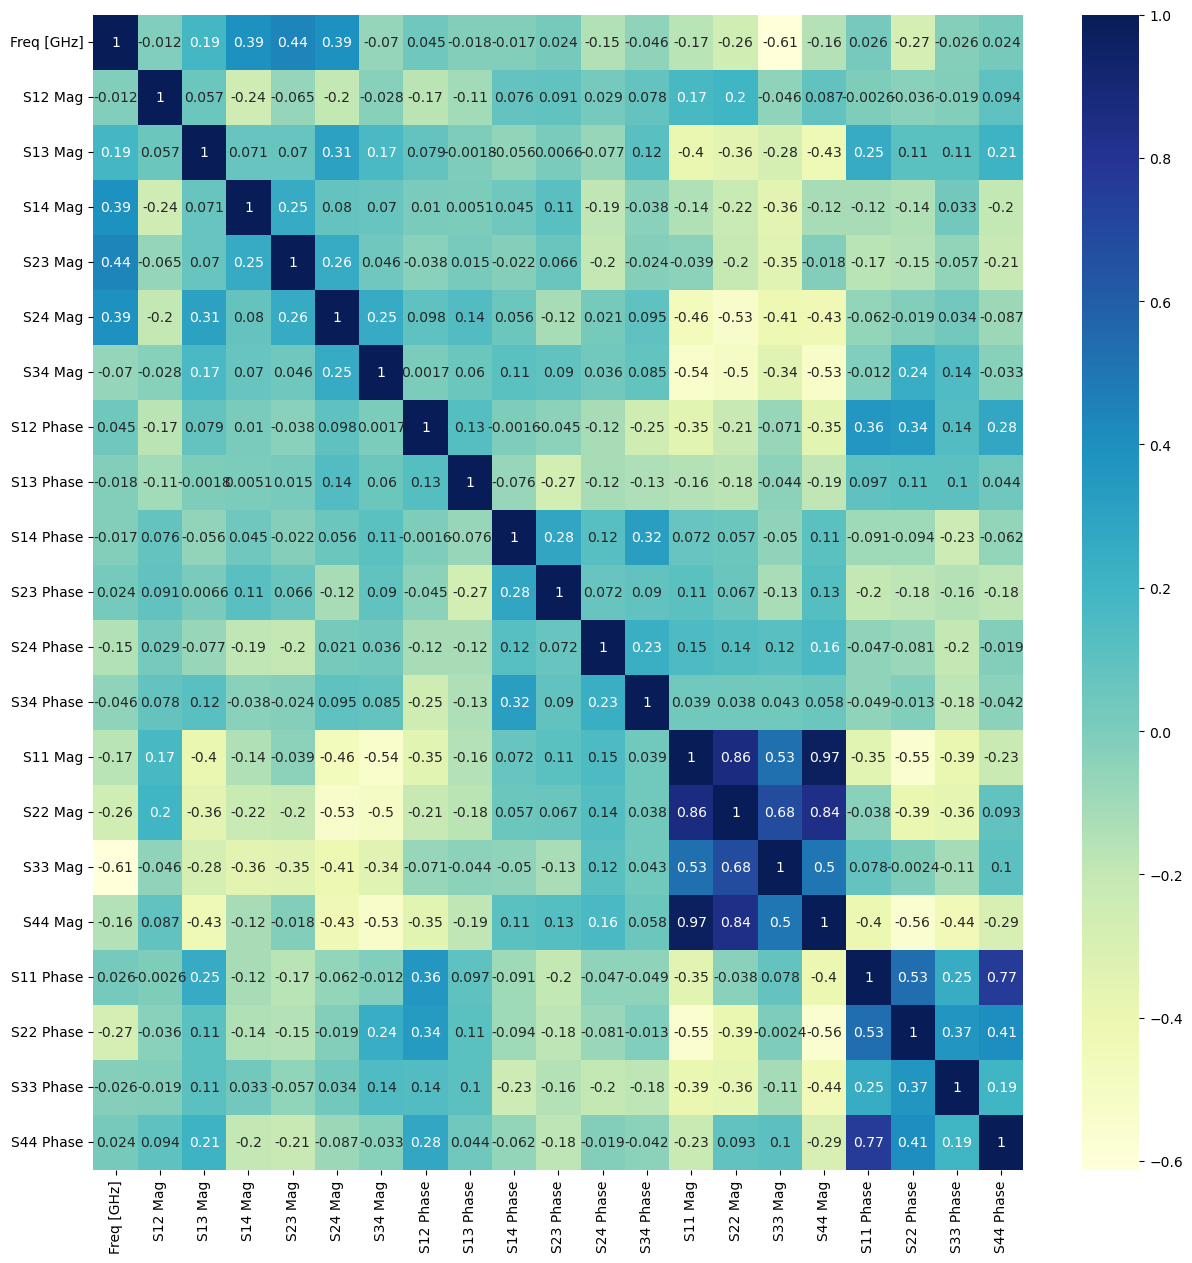

In [5]:
%matplotlib inline
corr = X.corr(numeric_only=True)
dataplot = sb.heatmap(corr, cmap="YlGnBu", annot=True)
dataplot.get_figure().set_size_inches(15, 15)

In [6]:
X, y = X.to_numpy(), y.to_numpy()

In [22]:
model = keras.models.Sequential(
    [
        keras.layers.Input(shape=(21,)),
        keras.layers.Normalization(axis=-1),
        keras.layers.Dense(128, activation="tanh"),
        keras.layers.Dense(1, activation='sigmoid'),
    ]
)
model.layers[0].adapt(X)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (None, 21)             │            43 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,988 (11.68 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 43 (176.00 B)

In [15]:
X_NORM = model.layers[0](X)

principal=PCA(n_components=3, random_state=42)
X_REDUCED = principal.fit_transform(X)
principal.explained_variance_ratio_.cumsum()

array([0.25577031, 0.39799683, 0.53021938])

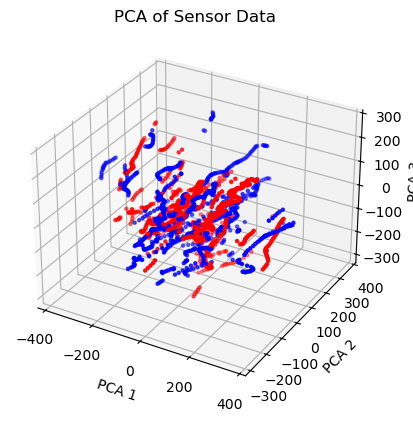

In [9]:
%matplotlib inline

color_based_on_y = ['red' if label == 1 else 'green' if label == -1 else 'blue' for label in y]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_REDUCED[:, 0], X_REDUCED[:, 1], X_REDUCED[:, 2], c=color_based_on_y, s=5)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('PCA of Sensor Data')
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

y_train = y_train.reshape(-1, 1)  # Reshape to (batch_size, 1)
y_test = y_test.reshape(-1, 1)    # Reshape to (batch_size, 1)

In [37]:
model = keras.models.Sequential(
    [
        keras.layers.Input(shape=(21,)),
        keras.layers.Normalization(axis=-1),
        keras.layers.Dense(128, activation="tanh"),
        keras.layers.Dense(1, activation='sigmoid'),
    ]
)
model.layers[0].adapt(X_train)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

loss = keras.losses.BinaryCrossentropy()
# optim = keras.optimizers.SGD(learning_rate=0.001)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = [
    keras.metrics.BinaryAccuracy(name="accuracy"),
    keras.metrics.F1Score(name="f1_score", threshold=0.5)
]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

epochs = 40

history = model.fit(
    X_train, y_train, epochs=epochs, batch_size=64, validation_split=0.1, shuffle=True, callbacks=[early_stopping],
)

Epoch 1/40


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5827 - f1_score: 0.5551 - loss: 0.6738 - val_accuracy: 0.8347 - val_f1_score: 0.8113 - val_loss: 0.5088
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8812 - f1_score: 0.8698 - loss: 0.4838 - val_accuracy: 0.9587 - val_f1_score: 0.9580 - val_loss: 0.3864
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9466 - f1_score: 0.9467 - loss: 0.3680 - val_accuracy: 0.9669 - val_f1_score: 0.9667 - val_loss: 0.3005
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9680 - f1_score: 0.9682 - loss: 0.2851 - val_accuracy: 1.0000 - val_f1_score: 1.0000 - val_loss: 0.2383
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9954 - f1_score: 0.9956 - loss: 0.2187 - val_accuracy: 1.0000 - val_f1_score: 1.0000 - val_loss: 0.1866
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9985 - f1_score: 0.9986 - loss: 0.1726 - val_accuracy: 1.0000 - val_f1_score: 1.0000 - val_loss: 0.1511
Ep

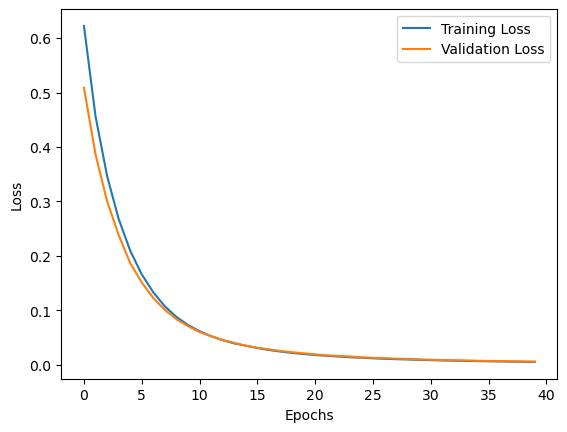

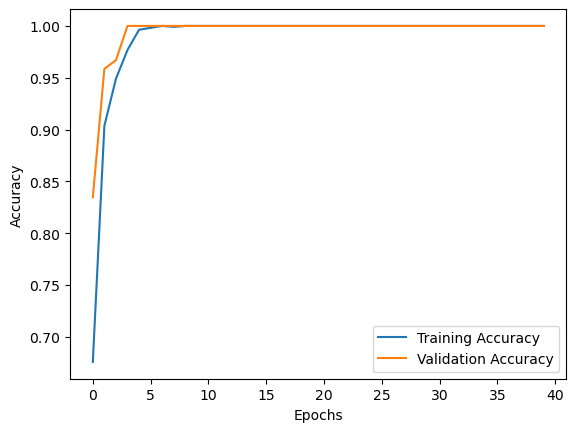

In [38]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
for layer in model.layers:
    weights = layer.get_weights()
    if len(weights) == 2:
        weights, biases = weights
        print(f"Layer: {layer.name}")
        print(f"Weights shape: {weights.shape}")
        print(f"Biases shape: {biases.shape}")


predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)

results = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

print("First 5 Predictions (Probabilities):", predictions[:5].flatten())
print("First 5 Predicted Labels:", predicted_labels[:5].flatten())
print("First 5 Actual Labels:", y_test[:5].flatten())

Layer: dense
Weights shape: (21, 128)
Biases shape: (128,)
Layer: dense_1
Weights shape: (128, 1)
Biases shape: (1,)
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
26/26 - 0s - 5ms/step - accuracy: 0.9863 - f1_score: 0.9865 - loss: 0.2829
Test Loss: 0.2828650176525116, Test Accuracy: 0.9862671494483948
First 5 Predictions (Probabilities): [0.37505105 0.54936457 0.2534352  0.7949309  0.23442073]
First 5 Predicted Labels: [0 1 0 1 0]
First 5 Actual Labels: [0. 1. 0. 1. 0.]


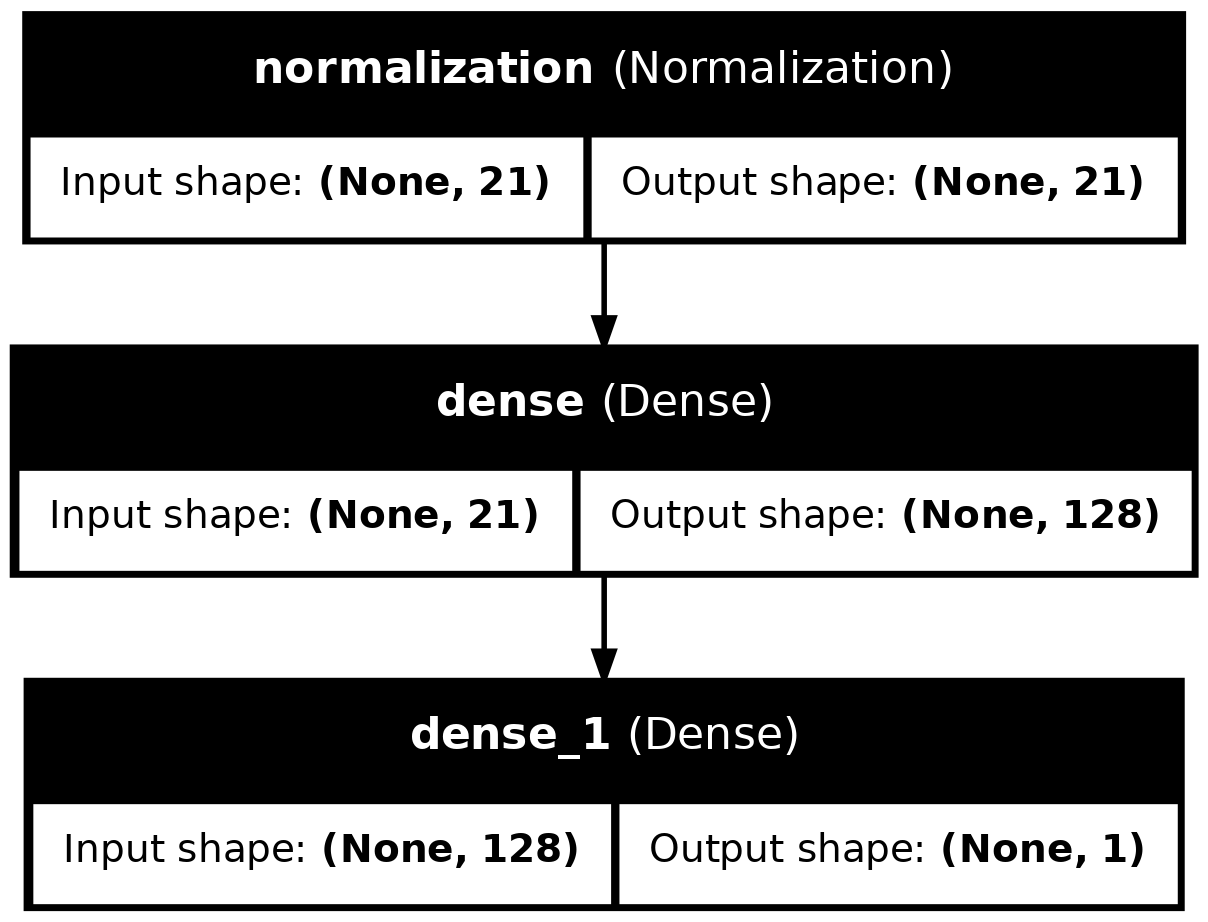

In [13]:
plot_model(
    model,
    to_file="model_plot.png",
    show_shapes=True,
    show_layer_names=True
)

Image(filename="model_plot.png")